In [40]:
#Import the dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [41]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [42]:
#Create a practice set of random latitude and longtitude combinations 
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x,y)

In [43]:
#Use the tuple() function to display the latitude and longtitude combination 
for coordinate in coordinates: 
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [44]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [45]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [46]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2439be442e195c8f5968524cfc17a8b0


In [47]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [48]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [49]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [50]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

qaqortoq gl
kailua us
ashqelon il
dali cn
saint-philippe re
palmer us
talnakh ru
bengkulu id
kapaa us
hilo us
barabai id
punta arenas cl
sao joao da barra br
cumaribo co
bengkulu id
alyangula au
attawapiskat ca
saskylakh ru
illoqqortoormiut gl
matara lk
samusu ws
bredasdorp za
pemangkat id
albany au
tiksi ru
esperance au
rikitea pf
cape town za
rikitea pf
oriximina br
kodiak us
vuktyl ru
qaanaaq gl
barentsburg sj
mataura pf
isangel vu
rikitea pf
yining cn
imuris mx
patiya bd
mar del plata ar
hermanus za
taolanaro mg
luderitz na
hobart au
mar del plata ar
zhuhai cn
albany au
hobart au
new norfolk au
taolanaro mg
ushuaia ar
rocha uy
illoqqortoormiut gl
east london za
takoradi gh
tuatapere nz
pitimbu br
castro cl
cape town za
mataura pf
illoqqortoormiut gl
albany au
misratah ly
hobart au
barrow us
dikson ru
boyolangu id
kindu cd
grand river south east mu
kaitangata nz
thompson ca
panama city us
paciran id
rikitea pf
narsaq gl
rikitea pf
dakar sn
rikitea pf
taolanaro mg
bluff nz
rantauprap

mazagao br
gunjur gm
ilulissat gl
sarahan in
karratha au
vaini to
nizhneyansk ru
kapaa us
victoria sc
sarkand kz
cherskiy ru
taolanaro mg
leningradskiy ru
sao joao da barra br
punta arenas cl
mar del plata ar
gazli uz
vao nc
ilulissat gl
palabuhanratu id
hasaki jp
atuona pf
esperance au
new norfolk au
makakilo city us
mackenzie ca
cabo san lucas mx
srednekolymsk ru
margate za
barrow us
jamestown sh
luderitz na
east london za
esperance au
bluff nz
codrington ag
tsihombe mg
jamestown sh
punta arenas cl
mataura pf
busselton au
willmar us
haibowan cn
mar del plata ar
port elizabeth za
port elizabeth za
bredasdorp za
necochea ar
rikitea pf
lompoc us
hobart au
usevya tz
grindavik is
goderich sl
nizhneyansk ru
pevek ru
albany au
tuktoyaktuk ca
atuona pf
georgetown sh
santa marta co
ushuaia ar
karamay cn
jalu ly
rikitea pf
karpathos gr
bambous virieux mu
puerto ayora ec
barrow us
kudahuvadhoo mv
meyungs pw
dum duma in
chokurdakh ru
vestmannaeyjar is
hermanus za
belushya guba ru
north bend us
v

In [51]:
#Create a list for holding cities
cities = []
#Identify the nearest city for each latitude and longtitude 
for coordinates in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name 
    
    #If the city is unique, the we will add it to the cities list 
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count 
len(cities)

1

In [52]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 1 | saint anthony


In [53]:
# Run an API request for each of the cities.
try:
    # Parse the JSON and retrieve data.
    city_weather = requests.get(city_url).json()
    # Parse out the needed data.
    city_lat = city_weather["coord"]["lat"]
    city_lng = city_weather["coord"]["lon"]
    city_max_temp = city_weather["main"]["temp_max"]
    city_humidity = city_weather["main"]["humidity"]
    city_clouds = city_weather["clouds"]["all"]
    city_wind = city_weather["wind"]["speed"]
    city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
    city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
    city_data.append({"City": city.title(),
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})

# If an error is experienced, skip the city.
except:
    print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Data Retrieval Complete      
-----------------------------


In [54]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint Anthony,45.02,-93.22,44.01,52,75,4.7,US,2020-10-30 18:33:27


In [55]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [56]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [57]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604082812.151978

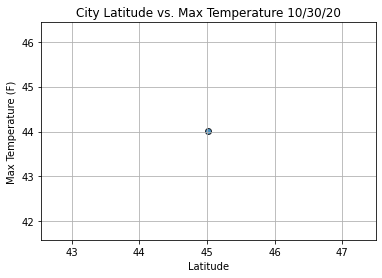

In [58]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

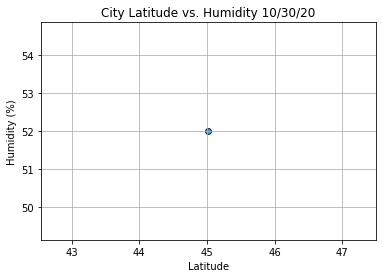

In [59]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

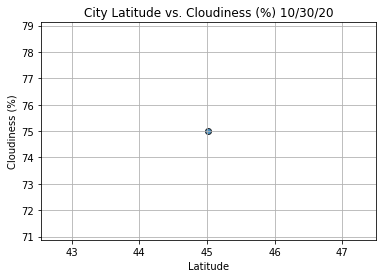

In [60]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

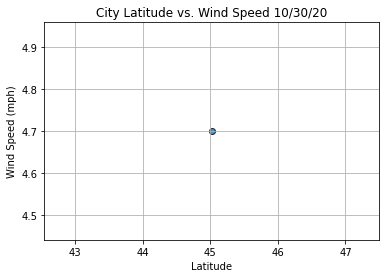

In [61]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()